In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [113]:
#-----Reading the image-----------------------------------------------------
img = cv2.imread(r'C:\Users\Original Windows\Downloads\test.jpg', 1)
#-----Converting image to LAB Color model----------------------------------- 
start_time = time.time()
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
ca = clahe.apply(a)
cb = clahe.apply(b)
#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,ca,cb))
#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
print("Processing time is: %s seconds." % (time.time() - start_time))
#_____END_____#

Processing time is: 0.014983415603637695 seconds.


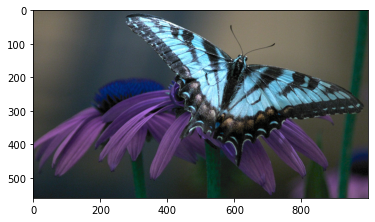

In [114]:
imgplot = plt.imshow(img)

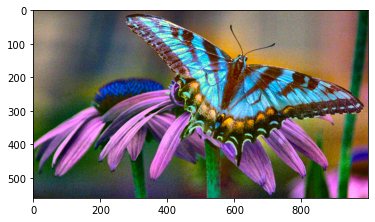

In [115]:
fnlplot = plt.imshow(final)

In [117]:
vidcap = cv2.VideoCapture(r'C:\Users\Original Windows\Downloads\bunny.mp4')
success, image = vidcap.read()
count = 0
#frame_count = 1440

while success:
    save_name = 'frame' + str(count) + '.jpg'
    #-----Reading the image-----------------------------------------------------
    cv2.imwrite('C:/Users/Original Windows/Downloads/Test/' + save_name , image)
    img = cv2.imread('C:/Users/Original Windows/Downloads/Test/' + save_name , 1)
    #-----Converting image to LAB Color model----------------------------------- 
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    #_____END_____#
    cv2.imwrite('C:/Users/Original Windows/Downloads/Enhanced/' + save_name , final)
    success, image = vidcap.read()
    print('Read a new frame : ', success)
    count += 1
    '''if count == frame_count:
        break
    else:
        print('Read a new frame : ', success)
        count += 1'''

Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True
Read a new frame :  True


In [118]:
print('Number of Frames Read : ', count)

Number of Frames Read :  1800


In [119]:
original = cv2.imread('C:/Users/Original Windows/Downloads/Test/frame250.jpg',1)
enhanced = cv2.imread('C:/Users/Original Windows/Downloads/Enhanced/frame250.jpg',1)

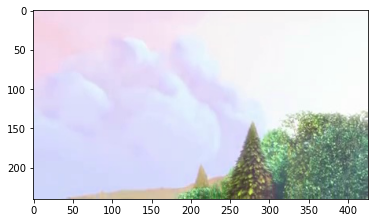

In [120]:
imgplot = plt.imshow(original)

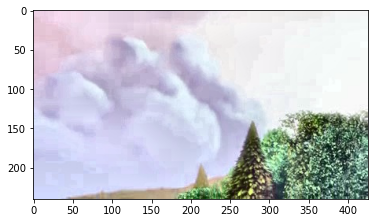

In [121]:
imgplot = plt.imshow(enhanced)

In [123]:
import os
from os.path import isfile, join
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    files.sort(key = lambda x: int(x[5:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [124]:
# Converting Enhanced to Video
pathIn= 'C:/Users/Original Windows/Downloads/Enhanced/'
pathOut = 'C:/Users/Original Windows/Downloads/Bunny_Enhanced.mp4'
fps = 30.0
convert_frames_to_video(pathIn, pathOut, fps)

C:/Users/Original Windows/Downloads/Enhanced/frame0.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame1.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame2.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame3.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame4.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame5.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame6.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame7.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame8.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame9.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame10.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame11.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame12.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame13.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame14.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame15.jpg
C:/Users/Original Windows/Downloads/Enhanced/frame16.jpg
C:/Users/Original Windows/Downloads/Enhan